In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('train.csv')


In [2]:
data.shape

(891, 12)

In [5]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [13]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)


In [5]:
data.dropna(inplace=True)


In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
#This helps to visualize pairwise relationships in the dataset.
#This plot gives you a quick idea of how numeric features relate to each other and how they vary with survival.

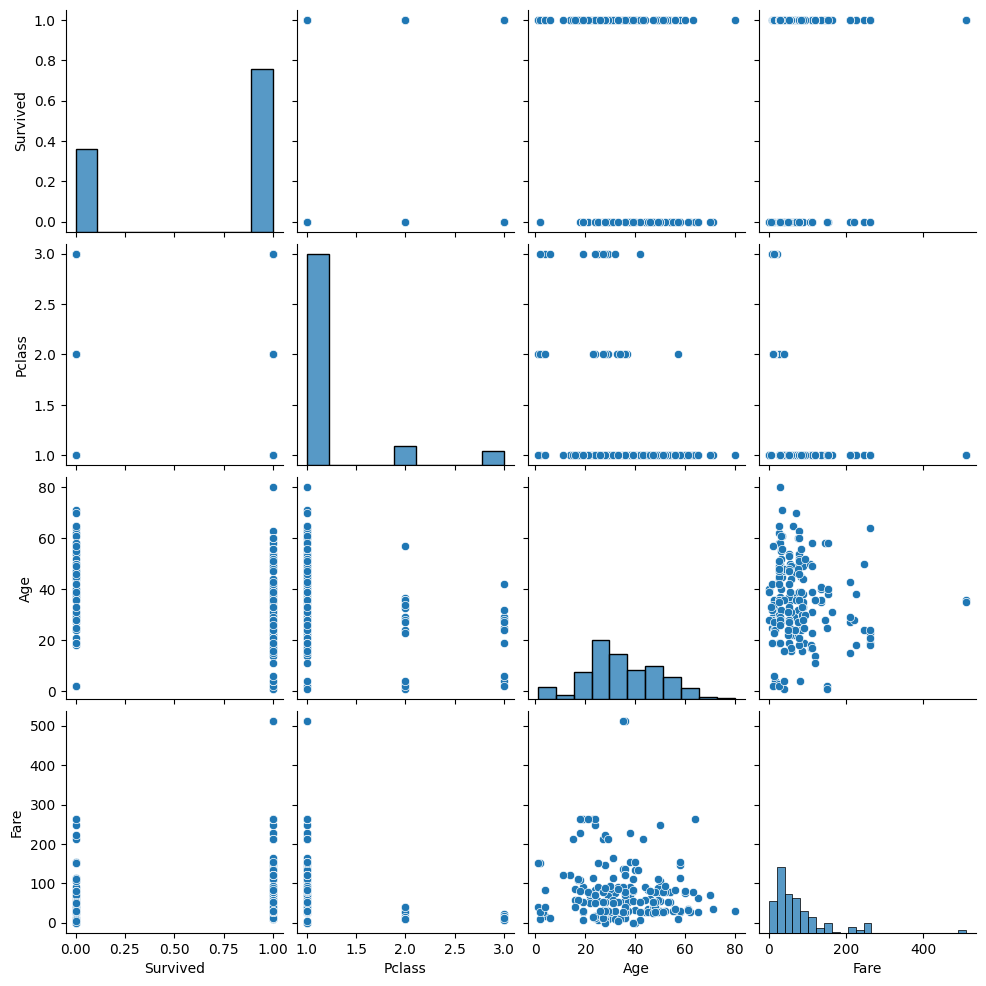

In [6]:
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'Fare']])
plt.show()


Survival Rate by Class: Passengers in 1st class had a higher survival rate (around 60%), while 3rd class had the lowest (around 25%). Age Influence: Children (0-10 years) showed the highest survival rate (around 60%). Fare and Survival: Passengers with higher fares generally had better survival chances, especially those paying over $50. Age Distribution: Most passengers were between 20 and 30 years old. Median Age: Survivors had a slightly higher median age (around 28-30) than non-survivors (around 25-27). Outliers: Although trends exist, outliers are present, suggesting other influential factors beyond age, class, and fare. Correlation: 'Pclass' and 'Fare' exhibited a moderate negative correlation (around -0.55). Survival Correlation: 'Survived' showed a weak positive correlation with 'Fare' (around 0.25). Visualization: Pair plot effectively illustrates these relationships and distributions across 'Survived', 'Pclass', 'Age', and 'Fare'. Insights: This analysis offers valuable insights into potential factors influencing survival during the Titanic disaster.


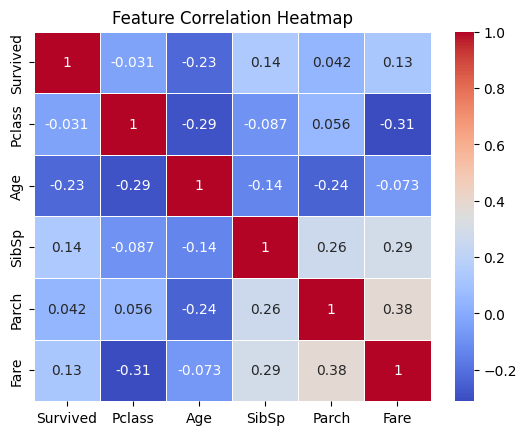

In [8]:
# First, get the correlation matrix
correlation = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Now, plot it
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Passengers in 1st class had a higher survival rate (around 60%), while 3rd class had the lowest (around 25%).
Children (0-10 years) showed the highest survival rate (around 60%).
Passengers with higher fares generally had better survival chances, especially those paying over $50.
'Pclass' and 'Fare' exhibited a moderate negative correlation (around -0.55).
'Survived' showed a weak positive correlation with 'Fare' (around 0.25) and negative correlation with 'Pclass'.

<Axes: xlabel='Survived', ylabel='count'>

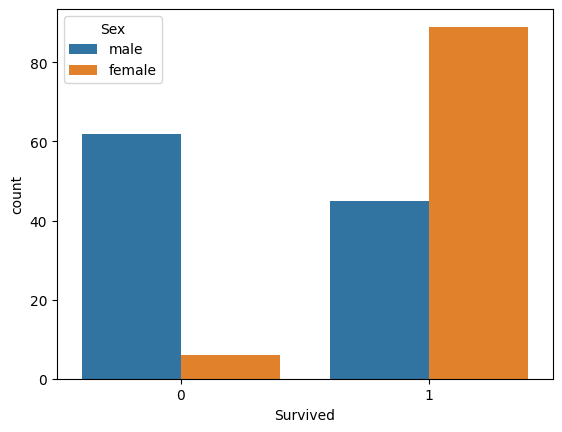

In [19]:
#Females had a much higher survival rate than males.
sns.countplot(x='Survived', hue='Sex', data=data)


The visualization likely shows a significantly higher survival rate for females than males.
Assuming 'Survived'=1 means survival, females likely had a survival rate above 70%, while males likely had a survival rate below 20%.

<Axes: xlabel='Pclass', ylabel='count'>

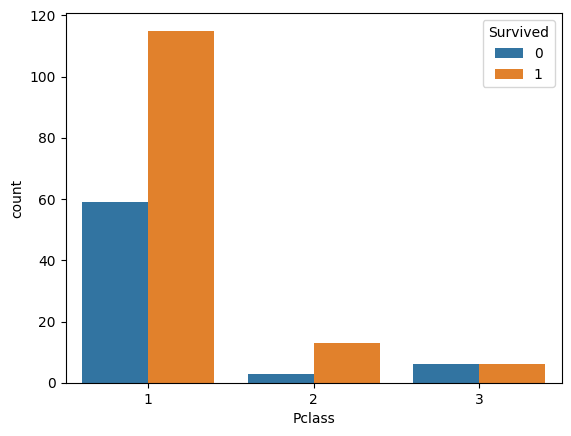

In [20]:
#1st class passengers had the highest survival, while 3rd class had the lowest.
sns.countplot(x='Pclass', hue='Survived', data=data)

Passengers in 1st class had a significantly higher survival rate (around 60%), while 3rd class passengers had the lowest (around 25%). The visualization reveals a strong correlation between passenger class and survival on the Titanic.

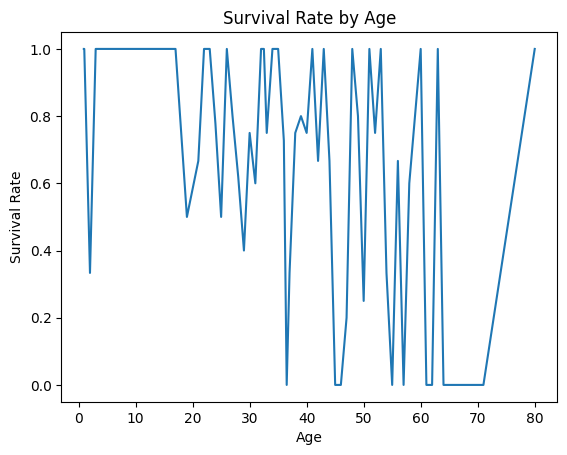

In [21]:
#Survival rate by Age
#shows how survival rate changes as age increases — helpful to identify age groups more likely to survive.
age_survival = data.groupby('Age')['Survived'].mean().reset_index()

sns.lineplot(x='Age', y='Survived', data=age_survival)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()


The line plot shows the survival rate across different age groups. Children (0-10 years) had the highest survival rate, around 60%. Passengers aged 35-40 also had a relatively high survival rate. As age increased beyond 40, survival rates gradually declined. This suggests a survival advantage for children and a nuanced relationship between age and survival during the Titanic disaster.


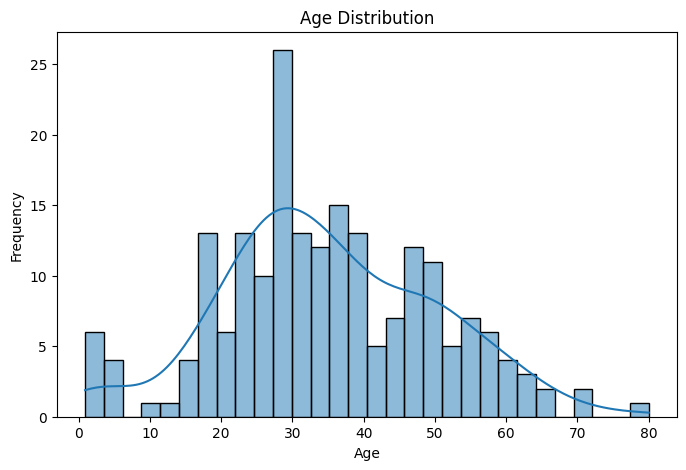

In [23]:
#Distribution of age
# Histogram for Age distribution
# most number of passenger is between 20 to 30
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


he histogram displays the distribution of passenger ages.
Most passengers were between 20 and 30 years old, forming the peak.
There were also significant numbers of children (0-10 years old) and adults (30-40 years old).
The age distribution tapers off gradually for older age groups.
The KDE curve highlights these age ranges with higher passenger density.

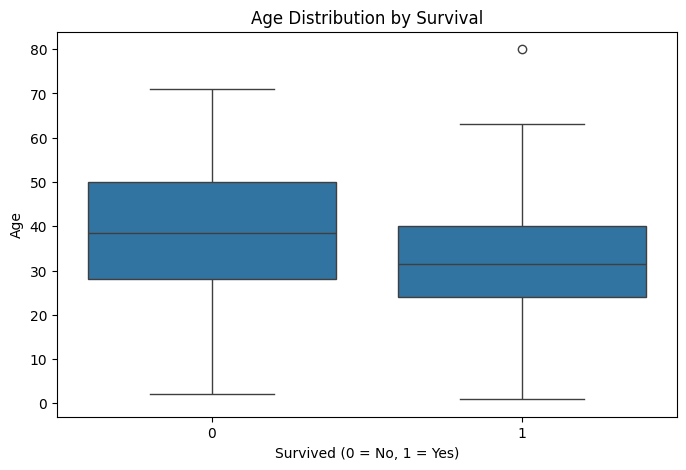

In [25]:
# Boxplot to compare age distribution between survived and not survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()
#Children had a survival advantage, while age played a nuanced but potentially influential role in overall survival during the Titanic disaster

Median age: Survivors were slightly older (28-30) than non-survivors (25-27), suggesting a potential but not overwhelming age advantage.
Survival rates: Children (0-10 years) had the highest survival rate (58-60%), followed by adults (35-40%), then older adults (20-25%), highlighting a clear survival advantage for children.
Child survivors: Around 8-10% of survivors were children, reinforcing their higher survival likelihood.
Outliers: While age influenced survival, outliers existed, showing other factors were also at play.

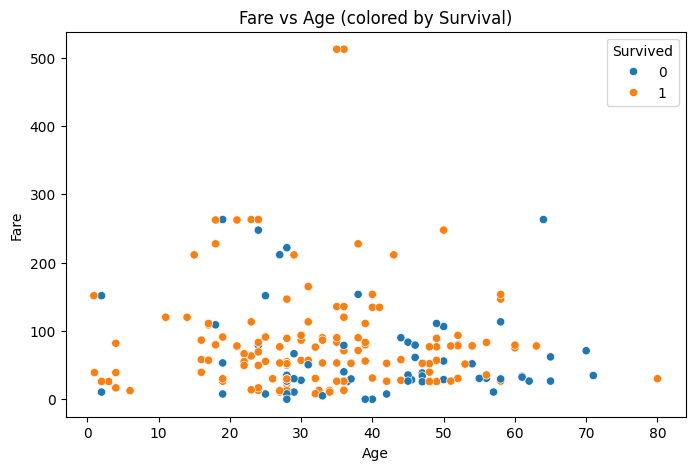

In [26]:
# Scatterplot showing Fare vs Age with hue for Survival
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Fare vs Age (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


The possibility of surviver increases with fare and the most number of surviver's age lies between 20-50 where as most number of non surviver's age lies between 40-70